## Project 2 - Continuous Control 

In [2]:
#Imports
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from collections import deque
from datetime import datetime as dt
import matplotlib.pyplot as plt
from ddpg_agent import Agent
%matplotlib inline

In [3]:
#Loading environment
env = UnityEnvironment(file_name='Reacher.app')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
#Reading
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
action_size = brain.vector_action_space_size
state_size = env_info.vector_observations.shape[1]

In [5]:
#Init Agent
agent = Agent(state_size=state_size, action_size=action_size, random_seed=2)

In [6]:
#DDPG from ddpg-pendulum
def ddpg(n_episodes=500, max_t=1000, print_every=100):
    target_score = 30     #Desired score
    scores_window = deque(maxlen=100)
    scores = []
    cont = True
    for i_episode in range(1, n_episodes+1):
        #resetting with train_mode true
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        #agent.reset()
        score = 0
        for t in range(max_t):
            agent.reset()
            action = agent.act(state)
            
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            
            agent.step(state, action, reward, next_state, done)
            
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)
        scores.append(score)
        #print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        #torch.save(agent.actor_local.state_dict(), f'checkpoint_actor.pth')
        #torch.save(agent.critic_local.state_dict(), f'checkpoint_critic.pth')
        #if i_episode % print_every == 0:
            #print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque))) 
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if np.mean(scores_window)>=30.0 and cont:
            cont = False    
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.actor_local.state_dict(), f'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), f'checkpoint_critic.pth')
            
    return scores

In [7]:
#Training
scores = ddpg()

Episode 100	Average Score: 2.49
Episode 200	Average Score: 27.69
Episode 208	Average Score: 30.13
Environment solved in 108 episodes!	Average Score: 30.13
Episode 300	Average Score: 36.47
Episode 400	Average Score: 36.84
Episode 500	Average Score: 37.56


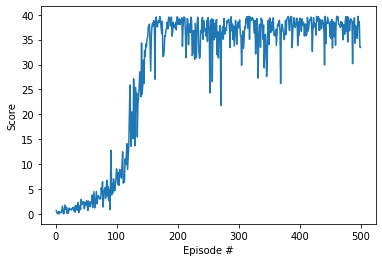

In [8]:
#Plotting the score vs count of episodes.
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [9]:
#close
env.close()
